In [1]:
import pandas as pd 
import numpy as np
import darts 
import yfinance as yf 
%matplotlib inline
%autosave 1
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

Autosaving every 1 seconds


Importing data

In [4]:
from datetime import datetime, timedelta

past =59

now = datetime.now()
d = now - timedelta(days=past)
date = d.strftime("%Y-%m-%d")
print(date)

2021-11-27


In [10]:
start = date

# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
#for theta 90 mins don't work
#work fine for 5 min 30 min 15 min and 1hr

ticker = yf.download(tickers='^NSEI',interval='5m',start=start)
ticker

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-11-29 09:15:00+05:30,17055.800781,17065.650391,16837.300781,16837.300781,16837.300781,0
2021-11-29 09:20:00+05:30,16838.099609,16846.300781,16783.949219,16844.449219,16844.449219,0
2021-11-29 09:25:00+05:30,16843.800781,16955.150391,16843.800781,16952.849609,16952.849609,0
2021-11-29 09:30:00+05:30,16955.449219,17021.250000,16927.099609,17003.300781,17003.300781,0
2021-11-29 09:35:00+05:30,17004.050781,17054.500000,16945.900391,16968.449219,16968.449219,0
...,...,...,...,...,...,...
2022-01-24 10:35:00+05:30,17396.900391,17414.900391,17392.849609,17413.699219,17413.699219,0
2022-01-24 10:40:00+05:30,17414.150391,17416.349609,17395.099609,17412.300781,17412.300781,0
2022-01-24 10:45:00+05:30,17411.500000,17411.500000,17393.900391,17397.449219,17397.449219,0


In [11]:
ticker.drop(['Adj Close','Volume'],axis = 1,inplace= True)
ticker

,Open,High,Low,Close
Datetime,,,,
2021-11-29 09:15:00+05:30,17055.800781,17065.650391,16837.300781,16837.300781
2021-11-29 09:20:00+05:30,16838.099609,16846.300781,16783.949219,16844.449219
2021-11-29 09:25:00+05:30,16843.800781,16955.150391,16843.800781,16952.849609
2021-11-29 09:30:00+05:30,16955.449219,17021.250000,16927.099609,17003.300781
2021-11-29 09:35:00+05:30,17004.050781,17054.500000,16945.900391,16968.449219
...,...,...,...,...
2022-01-24 10:35:00+05:30,17396.900391,17414.900391,17392.849609,17413.699219
2022-01-24 10:40:00+05:30,17414.150391,17416.349609,17395.099609,17412.300781
2022-01-24 10:45:00+05:30,17411.500000,17411.500000,17393.900391,17397.449219


In [17]:
data = pd.DataFrame(ticker['Close']).dropna()
data = data.reset_index(drop=True)
data

,Close
0,16837.300781
1,16844.449219
2,16952.849609
3,17003.300781
4,16968.449219
...,...
3014,17413.699219
3015,17412.300781
3016,17397.449219
3017,17392.500000


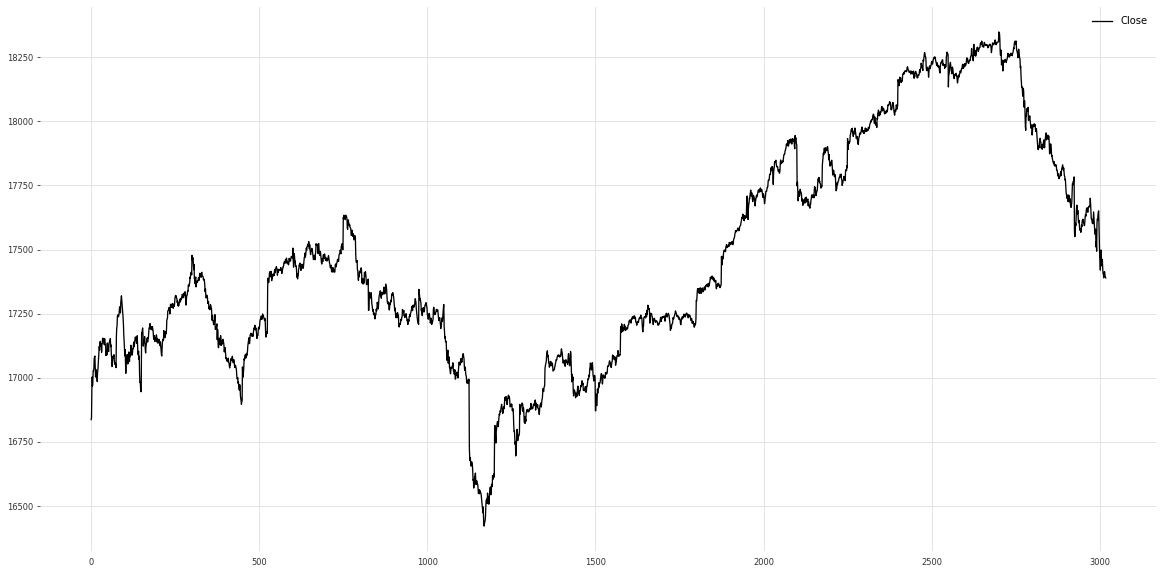

In [18]:
data.plot();


In [15]:
from darts.timeseries import TimeSeries

In [16]:
data_timeseries = TimeSeries.from_dataframe(data, time_col=None, value_cols=None, fill_missing_dates=False, freq='B', fillna_value=False)
data_timeseries

[2022-01-24 10:53:49,692] ERROR | darts.timeseries | ValueError: Could not correctly fill missing dates with the observed/passed frequency freq='B'. Not all input time stamps contained in the newly created TimeSeries. For more information about frequency aliases, read https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases


ValueError: Could not correctly fill missing dates with the observed/passed frequency freq='B'. Not all input time stamps contained in the newly created TimeSeries. For more information about frequency aliases, read https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [23]:
#not scaling as scaling gives error

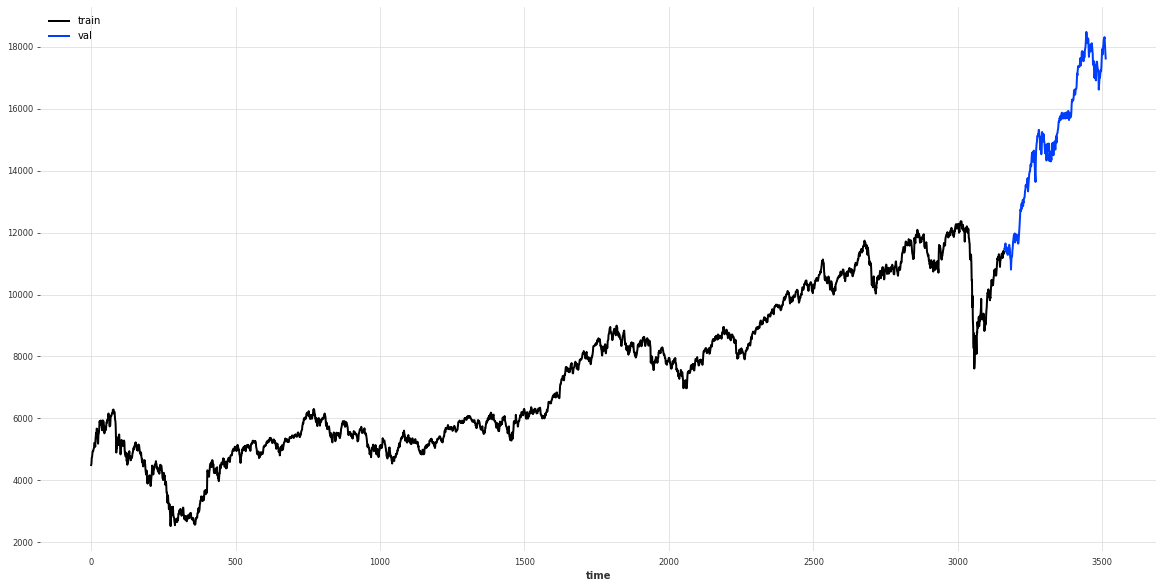

In [24]:
length = int(len(data)*(.90))
train, val = data_timeseries[:length], data_timeseries[length:]
train.plot(label='train')
val.plot(label='val')

In [25]:
from darts.models import Theta
from darts.metrics import mape

In [26]:
# Search for the best theta parameter, by trying different values

thetas = np.linspace(-300, 300, 600)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE is: {:.2f} %, with theta = {} .'.format(mape(val, pred_best_theta), best_theta))

The MAPE is: 15.30 %, with theta = -0.50083472454088 .


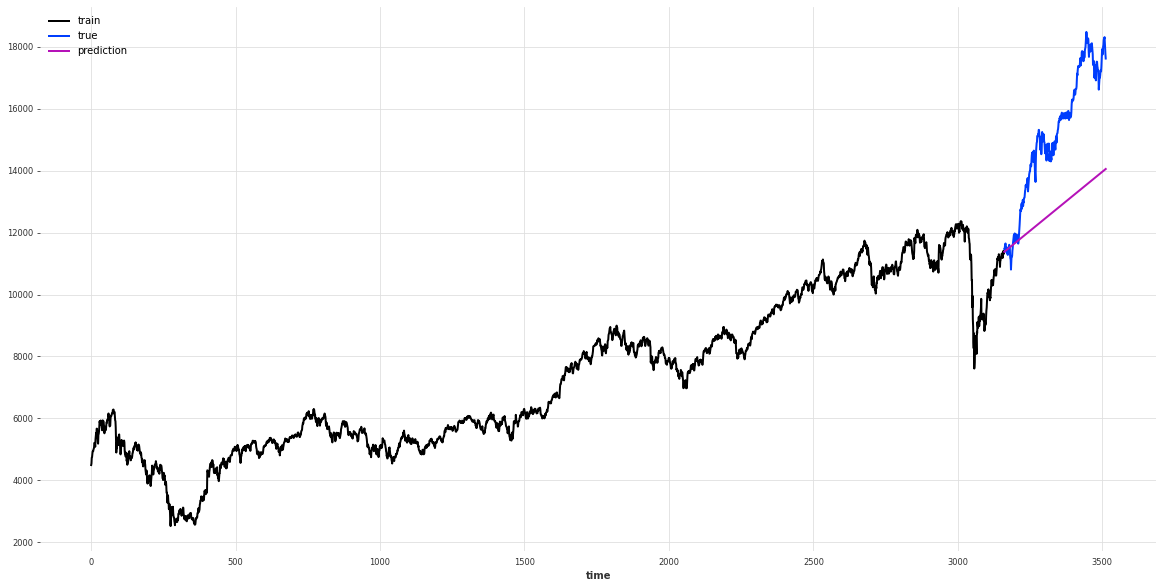

In [27]:
train.plot(label='train')
val.plot(label='true')
pred_best_theta.plot(label='prediction')

In [28]:
best_theta_model.predict(3)

<TimeSeries (DataArray) (time: 3, component: 1, sample: 1)>
array([[[11378.95945548]],

       [[11386.57562442]],

       [[11394.19179335]]])
Coordinates:
  * time       (time) int64 3161 3162 3163
  * component  (component) object 'Close'
Dimensions without coordinates: sample

In [29]:
val[:3]

<TimeSeries (DataArray) (time: 3, component: 1, sample: 1)>
array([[[11466.45019531]],

       [[11472.25      ]],

       [[11549.59960938]]])
Coordinates:
  * time       (time) int64 3161 3162 3163
  * component  (component) object 'Close'
Dimensions without coordinates: sample

  0%|          | 0/3474 [00:00<?, ?it/s]

MAPE = 2.88%


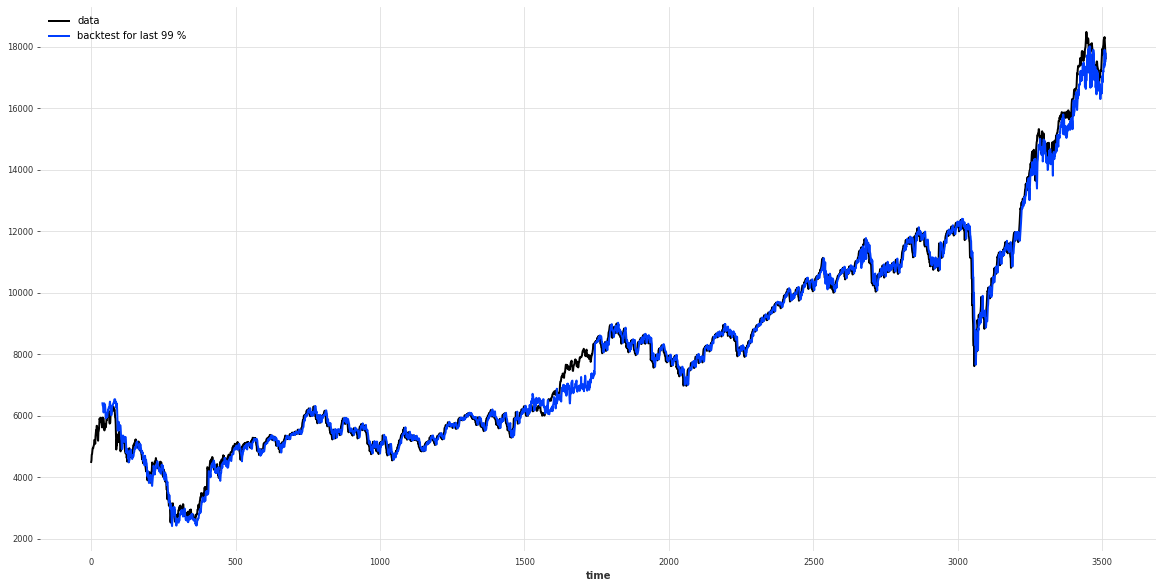

In [30]:
#must between 99 and 1

test_for_recent_percentage_data = 99                           

historical_fcast_theta = best_theta_model.historical_forecasts(data_timeseries,
                                                               start=(100-test_for_recent_percentage_data)/100,
                                                               forecast_horizon=5,
                                                               verbose=True)

data_timeseries.plot(label='data')
historical_fcast_theta.plot(label=f"backtest for last {test_for_recent_percentage_data} %")
print('MAPE = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))

In [31]:
#MAPE = 0.42%  --before Scaling

In [32]:
#my model 
best_theta_model = Theta(best_theta)
best_theta_model.fit(data_timeseries)
prediction = best_theta_model.predict(5)
prediction

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[17319.90261731]],

       [[17575.12195288]],

       [[17520.01967427]],

       [[17453.59910377]],

       [[17399.36306859]]])
Coordinates:
  * time       (time) int64 3513 3514 3515 3516 3517
  * component  (component) object 'Close'
Dimensions without coordinates: sample

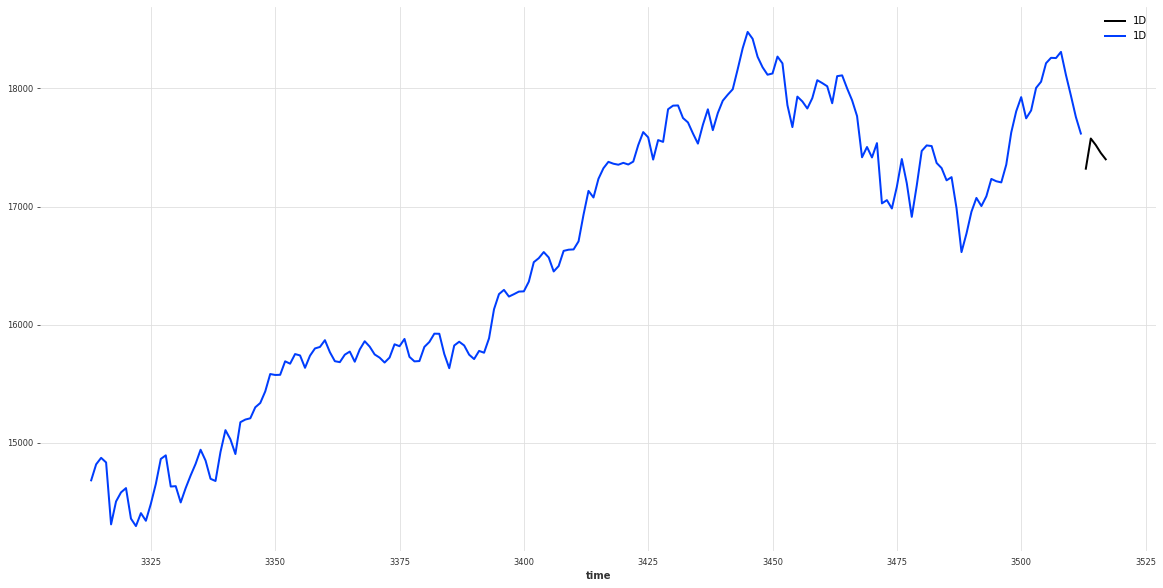

In [35]:
prediction.plot(label='1D')
data_timeseries[-200:].plot(label='1D')

In [34]:
# for 5 min days are 60
# for 15 mins,30 mins days are +1